## Preisvorhersage Model
## Exploratory Data Analysis(Part - 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [2]:
oto1 = pd.read_csv("autoscout_precleaned.csv")

In [3]:
oto1.shape

(15919, 122)

In [4]:
oto1.head()

,make_model,body_type,price,vat,km,type,paint type,upholstery,cylinders,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,['\nMetallic\n'],"Cloth, Black",3.00,nan,2,1,2021-06-01,Metallic,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,99.00,1422.00,Euro 6,4.00,Diesel,5.00,5.00,66
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,NaN,"Cloth, Grey",4.00,7.00,1,0,NaN,NaN,NaN,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,129.00,1798.00,Euro 6,3.00,Benzine,3.00,4.00,141
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,['\nMetallic\n'],"Cloth, Black",nan,nan,1,0,NaN,Metallic,NaN,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,99.00,1598.00,Euro 6,4.00,Diesel,4.00,4.00,85
3,Audi A1,Sedans,14500,NaN,73000.00,Used,['\nMetallic\n'],NaN,3.00,6.00,1,0,NaN,Metallic,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,NaN,Brown,99.00,1422.00,Euro 6,4.00,Diesel,3.00,4.00,66
4,Audi A1,Sedans,16790,NaN,16200.00,Used,['\nMetallic\n'],"Cloth, Black",3.00,nan,1,1,NaN,Metallic,Germany,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,

### Werfen wir einen Blick auf die Spalten, in denen Werte fehlen.

In [5]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

['vat',
 'km',
 'type',
 'paint type',
 'upholstery',
 'cylinders',
 'gears',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'consumption_comb',
 'drive_chain',
 'displacement_cc',
 'emission_class',
 'register_age',
 'nr_doors',
 'nr_seats']

## Umgang mit fehlenden Werten und Ausreißern

In [6]:
def fill_most(group_col, col_name): 
      for group in list(oto1[group_col].unique()):
        grp_inx=list(oto1[oto1[group_col]==group][col_name].index)
        oto1[col_name].iloc[grp_inx]=oto1[col_name].iloc[grp_inx].fillna(oto1[oto1[group_col]==group][col_name].mode()[0])

***

### ``"body_type"``

In [7]:
oto1.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [8]:
oto1.body_type[oto1.body_type == "Other"] = np.nan
fill_most("make_model", "body_type")

<AxesSubplot:>

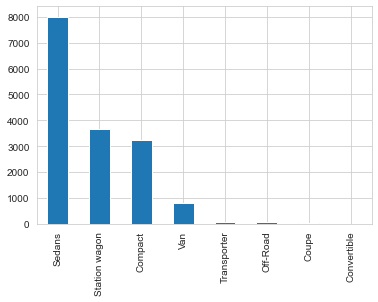

In [9]:
oto1.body_type.value_counts(dropna = False).plot(kind = "bar")

***

### ``"cylinders"``

- Wir müssen eine Schlussfolgerung ziehen, wenn wir sie fallen lassen sollen. Zuerst werden wir fehlende Werte füllen, bevor wir eine Entscheidung treffen.

In [10]:
oto1.cylinders.value_counts(dropna=False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='make_model'>

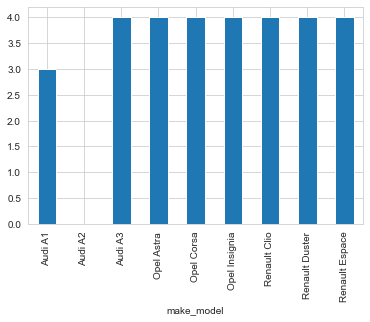

In [11]:
oto1.groupby('make_model')['cylinders'].median().plot(kind = "bar")

In [12]:
oto1.groupby('make_model')['cylinders'].transform('median')

0       3.00
1       3.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [13]:
test1 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))
test2 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].median())

In [14]:
test1.value_counts(dropna = False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [15]:
test2.value_counts(dropna = False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

In [16]:
oto1['cylinders'] = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))

In [17]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [18]:
# Audi A-2 hat keinen Wert. Also gehört dieser Nan zu A-2?

oto1.cylinders.fillna(3, inplace=True)

In [19]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2964
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
Name: cylinders, dtype: int64

In [20]:
oto1.drop("cylinders", axis = 1, inplace = True)

***

### ``"gears"``

In [21]:
oto1.gears.value_counts(dropna = False)

6.00    5822
nan     4712
5.00    3240
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

In [22]:
oto1["gears"] = oto1["gears"].fillna(oto1.groupby("make_model")["gears"].transform("median"))

In [23]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4412
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
nan        1
Name: gears, dtype: int64

In [24]:
oto1.groupby("make_model")["gears"].median()

make_model
Audi A1          6.00
Audi A2           nan
Audi A3          6.00
Opel Astra       6.00
Opel Corsa       5.00
Opel Insignia    6.00
Renault Clio     5.00
Renault Duster   6.00
Renault Espace   6.00
Name: gears, dtype: float64

In [25]:
oto1.gears.fillna(5, inplace = True)

In [26]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4413
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

### Umgang mit Ausreißern

In [27]:
oto1[oto1["gears"] == 4]

,make_model,body_type,price,vat,km,type,paint type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.00,New,['\nMetallic\n'],Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15823,Renault Espace,Van,50950,VAT deductible,11.00,New,['\nMetallic\n'],Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165


In [28]:
oto1.gears.iloc[15822] = 7
oto1.gears.iloc[15823] = 7

In [29]:
oto1[oto1["gears"] == 3]

,make_model,body_type,price,vat,km,type,paint type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15817,Renault Espace,Van,54204,VAT deductible,11.00,New,['\nMetallic\n'],Part leather,3.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.40,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,146
15845,Renault Espace,Van,46660,VAT deductible,11.00,New,NaN,Part leather,3.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.10,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,118


In [30]:
oto1.gears.iloc[15817] = 7
oto1.gears.iloc[15845] = 7

In [31]:
oto1[oto1["gears"] == 1]

,make_model,body_type,price,vat,km,type,paint type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.00,Used,['\nMetallic\n'],"Cloth, Black",1.00,1,0,NaN,Metallic,Belgium,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.80,Semi-automatic,front,Blue,112.00,1398.00,Euro 6,2.00,Benzine,5.00,5.00,66
14375,Renault Clio,Compact,23990,NaN,10.00,Demonstration,NaN,NaN,1.00,1,0,NaN,NaN,Austria,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,nan,Automatic,NaN,White,116.00,1618.00,NaN,2.00,Benzine,4.00,nan,147


In [32]:
oto1.gears.iloc[8921] = 5
oto1.gears.iloc[14375] = 6

In [33]:
oto1[oto1['gears'] == 2]

,make_model,body_type,price,vat,km,type,paint type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.00,Used,['\nMetallic\n'],"Cloth, Black",2.00,1,0,NaN,Metallic,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,nan,Manual,NaN,Grey,116.00,1229.00,Euro 6,2.00,Benzine,5.00,nan,51


In [34]:
oto1.gears.iloc[9812] = 5

In [ ]:
oto1[oto1['gears'] == 9]

In [ ]:
indx_list = list(oto1[oto1["gears"] == 9].index)

In [ ]:
indx_list

In [ ]:
for indx in indx_list:
    oto1.gears.iloc[indx] = 7

In [ ]:
oto1.gears.value_counts(dropna = False).plot(kind = "bar")

***

### ``"type"``

In [ ]:
oto1.type.value_counts(dropna = False)

In [ ]:
oto1.iloc[list(oto1.loc[oto1.type.isnull(), 'type'].index)]

In [ ]:
oto1.type.fillna("Used", inplace = True)

In [ ]:
oto1.type.value_counts(dropna = False).plot(kind = "bar")

***

### ``"upholstery"``

In [ ]:
oto1.upholstery.value_counts(dropna = False)

In [ ]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts(dropna = False)

In [ ]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts().sum()

In [ ]:
9634 / 12199  # cloth

In [ ]:
3720 * 0.7897368636773506

- Wir können  2900 ``nan`` mit ``"cloth"`` und 820 ``nan`` with ``"leather"`` ausfüllen

In [ ]:
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 900, inplace = True)

In [ ]:
upholstery_bool_list = oto1['upholstery'].str.contains('leather|alcantara', case = False, regex = True)

In [ ]:
oto1.loc[upholstery_bool_list, "upholstery"] = "Part/Full Leather"

In [ ]:
oto1.upholstery.loc[lambda x : x!= "Part/Full Leather"] = "Cloth"

In [ ]:
oto1.upholstery.value_counts(dropna = False).plot(kind = "bar")

`upholstery` ist eine kategoriale Variable und sollte am Ende `get_dummies () '' implementiert werden.

***

### ``"register_age"``

In [ ]:
oto1.register_age.value_counts(dropna = False)

In [ ]:
oto1[oto1.register_age.isnull()]["km"].value_counts(dropna = False)

In [ ]:
oto1[oto1.register_age.isnull()]["km"].mean()

In [ ]:
oto1[oto1.register_age.isnull()]["km"].median()

- Wir können daraus schließen, dass `` NaN`` -Werte mit `` 0`` Jahr gefüllt werden können

In [ ]:
oto1.register_age.fillna(0, inplace = True)

In [ ]:
oto1.register_age.value_counts(dropna = False).plot(kind = "bar")

-Es enthält numerische Werte, wir können es entweder als kategorisch oder kontinuierlich betrachten. Wenn wir "get_dummies ()" implementieren.

### ``"km"``

In [ ]:
oto1.km.value_counts(dropna = False)

In [ ]:
oto1.groupby("register_age")["km"].transform("mean")

In [ ]:
oto1['km'] = oto1['km'].fillna(oto1.groupby('register_age')['km'].transform('mean'))

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(oto1.km, bins = 50)

plt.subplot(142)
plt.boxplot(oto1.km)

plt.subplot(143)
plt.boxplot(oto1.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(oto1.km), whis = 2.5)
plt.show()

In [ ]:
oto1["km_logged"] = np.log(oto1.km)

In [ ]:
oto1.km.sort_values(ascending = False).head()

***

### ``"vat"``

In [ ]:
oto1.vat.value_counts(dropna = False)

- Wir können fehlende Werte der sich wiederholenden füllen.

In [ ]:
oto1.vat.fillna(method = "ffill", inplace = True)

In [ ]:
oto1.vat.value_counts(dropna = False).plot(kind = "bar")

-`vat` ist eine kategoriale Variable und sollte` get_dummies ()` implementiert werden

***

### next_inspection

In [ ]:
oto1.next_inspection.value_counts(dropna = False)

In [ ]:
oto1.drop("next_inspection", axis = 1, inplace = True)

***

### ``"paint_type"``

In [ ]:
oto1.paint_type.value_counts(dropna = False)

In [ ]:
oto1.drop("paint_type", axis = 1, inplace = True)

***

### ``"country"``

In [ ]:
oto1.country.value_counts(dropna = False)

In [ ]:
oto1.drop("country", axis = 1, inplace = True)

***

### ``"emission_label"``

In [ ]:
oto1.emission_label.value_counts(dropna = False)

In [ ]:
oto1.drop("emission_label", axis = 1, inplace = True)

***

### ``"consumption_comb"``

In [ ]:
oto1.consumption_comb.value_counts(dropna = False)

### Umgang mit Ausreißern
- Wir können sehen, dass es scheint, dass "consumption_comb" -Werte von "0", "1", "1,2" und "1,6" bedeutungslos sind.
- Also können wir sie in NaNs umwandeln und sie dann füllen.

In [ ]:
oto1.consumption_comb.sort_values().head(55).unique()

In [ ]:
oto1.consumption_comb.sort_values().tail(55).unique()

In [ ]:
consumption_outlier = oto1.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [ ]:
consumption_outlier.value_counts()

In [ ]:
oto1.loc[consumption_outlier, "consumption_comb"] = np.nan

In [ ]:
oto1.groupby("make_model")["consumption_comb"].mean()

In [ ]:
oto1.groupby("make_model")["consumption_comb"].median()

In [ ]:
oto1[oto1["make_model"] == "Renault Duster"].shape[0]

In [ ]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1.groupby("make_model")["consumption_comb"].transform("mean"))

In [ ]:
oto1.consumption_comb.isnull().sum()

In [ ]:
oto1["consumption_comb"].mean()

In [ ]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1["consumption_comb"].mean())

In [ ]:
oto1.consumption_comb.isnull().sum()

In [ ]:
oto1.consumption_comb.sort_values().tail(44)

In [ ]:
oto1.consumption_comb.describe()

In [ ]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(oto1.consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(oto1.consumption_comb, whis = 2.5)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.consumption_comb), bins=25)

plt.subplot(122)
plt.boxplot(np.log(oto1.consumption_comb), whis = 2)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(winsorize(oto1.consumption_comb, (0.003)), bins=22)

plt.subplot(122)
plt.boxplot(winsorize(oto1.consumption_comb, (0.003)), whis = 2)

plt.show()

***

### ``"drive_chain"``

In [ ]:
oto1.drive_chain.value_counts(dropna = False)

In [ ]:
fill_most("make_model", "drive_chain")

In [ ]:
oto1.drive_chain.value_counts(dropna=False).plot(kind = "bar")

- `drive_chain` is a categorical variable and should be implemented `get_dummies()`

***

### displacement_cc

In [ ]:
oto1.displacement_cc.value_counts(dropna = False)

In [ ]:
oto1.displacement_cc.isin([np.nan]).value_counts(dropna = False)

In [ ]:
fill_most("make_model", "displacement_cc")

In [ ]:
oto1.displacement_cc.isnull().sum()

In [ ]:
oto1.displacement_cc.describe()

In [ ]:
oto1.sort_values(by = ["displacement_cc"], ascending = False)["displacement_cc"].head(45)

In [ ]:
oto1.sort_values(by=['displacement_cc'])["displacement_cc"].head(55) 

- "displacement_cc" kann nicht "16000", "15898", "1", "2", "54", "122", "139", "140" oder "160" sein

In [ ]:
outlier_bool_list = oto1.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [ ]:
oto1.loc[outlier_bool_list, "displacement_cc"] = np.nan

In [ ]:
fill_most("make_model", "displacement_cc")

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(oto1.displacement_cc, whis = 2.5)

plt.show()

***

### `"emission_class"`

In [ ]:
oto1.emission_class.value_counts(dropna = False)

In [ ]:
oto1.drop("emission_class", axis = 1, inplace = True)

***

### `"nr_doors"`

In [ ]:
oto1.nr_doors.value_counts(dropna = False)

In [ ]:
fill_most("make_model", "nr_doors")

In [ ]:
oto1.nr_doors.value_counts(dropna = False)

In [ ]:
oto1[oto1['nr_doors'] == 7.0]

In [ ]:
oto1.nr_doors.iloc[15202] = 5

In [ ]:
oto1[oto1['nr_doors']==1.0]

In [ ]:
oto1.nr_doors.iloc[13782] = 5

In [ ]:
oto1.nr_doors.value_counts(dropna = False).plot(kind = "bar")

In [ ]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(x = "nr_doors", y = "make_model", hue = "drive_chain", data = oto1,
               height = 9, kind = "bar", palette = "muted")

g.despine(left = True)
g.set_ylabels("Models")

***

### ``"nr_seats"``

In [ ]:
oto1.nr_seats.value_counts(dropna = False)

In [ ]:
fill_most("make_model", "nr_seats")

In [ ]:
oto1.nr_seats.value_counts(dropna=False)

In [ ]:
oto1[oto1['nr_seats'] == 6.0]

In [ ]:
oto1.nr_seats.iloc[582] = 5
oto1.nr_seats.iloc[15890] = 5

In [ ]:
oto1[oto1['nr_seats'] == 3.0]

In [ ]:
oto1.nr_seats.iloc[1636] = 5

In [ ]:
oto1.nr_seats.value_counts(dropna = False).plot(kind = "bar")

***

### fuel_new

In [ ]:
oto1.fuel_new.value_counts(dropna = False)

In [ ]:
sns.set(style="whitegrid", font_scale = 1.1)

g = sns.catplot(x="gears", y="make_model", hue="fuel_new", data=oto1,
                height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Models")

In [ ]:
oto1.isnull().sum()*100/oto1.shape[0]

### Es scheint, dass der Prozess des "Umgangs mit fehlenden Werten" abgeschlossen ist.

In [ ]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

### Wieder EDA

In [ ]:
oto1.corr()

### Korrelation mit Heatmap

In [ ]:
numeric_col = "price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw".split(",")

In [ ]:
oto_corr = oto1[numeric_col]

In [ ]:
oto_corr

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

In [ ]:
sns.set()

cols=["price", "co2_emission", "km", "consumption_comb", "register_age", "hp_kw"]

sns.pairplot(oto1[cols], size = 2.5)

plt.show()

In [ ]:
oto1.co2_emission.describe()

In [ ]:
oto1.drop("co2_emission", axis = 1, inplace = True)

### ``"price"``

In [ ]:
oto1.price.describe()

In [ ]:
oto1.price.sort_values().head(33)

In [ ]:
oto1.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [ ]:
oto1.shape

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.price, bins=20)

plt.subplot(122)
plt.boxplot(oto1.price, whis=3)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.price), bins=22)

plt.subplot(122)
plt.boxplot(np.log(oto1.price), whis=2.3)

plt.show()

***

### co2 emission

In [ ]:
#--

***

### ``"previous_owner"``

***

### ``"hp_kw"``

In [ ]:
oto1.hp_kw.sort_values().head(55)

In [ ]:
oto1.hp_kw.unique()

In [ ]:
oto1.hp_kw.loc[oto1.hp_kw < 40] = np.nan

In [ ]:
oto1.hp_kw.isnull().sum()

In [ ]:
oto1["hp_kw"] = oto1["hp_kw"].fillna(oto1.groupby("make_model")["hp_kw"].transform("median"))

In [ ]:
oto1.hp_kw.isnull().sum()

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(oto1.hp_kw, bins=15)

plt.subplot(122)
plt.boxplot(oto1.hp_kw, whis=2.5)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(oto1.hp_kw), bins=15)

plt.subplot(122)
plt.boxplot(np.log(oto1.hp_kw), whis=2.5)

plt.show()

In [ ]:
oto1.hp_kw.sort_values().head(55)

In [ ]:
oto1.shape

In [ ]:
oto1.head()

In [ ]:
oto2 = pd.get_dummies(oto1)

In [ ]:
oto2.shape

In [ ]:
oto2.head()

In [ ]:
oto2.to_csv("autoscout_precleaned_2.csv", index = False)

## End of this Project. Next step will be :
- Runing the Regression ML Model